# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

__Directions:__ Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [2]:
df.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

## Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

In [4]:
number_of_countries = df['country'].nunique()

print("Number of countries:", number_of_countries)

Number of countries: 219


In [5]:
df1 = df.sort_values(by='year')
min_date = df1.year[0]
max_date = 0
for r in df.year:
    date = r
    if max_date is None or date > max_date:
        max_date = date   
print("Timespan:", min_date, "to", max_date)


Timespan: 1980 to 2013


In [6]:
countries = df['country'].unique()
years = df['year'].unique()
all_years = True
for country in countries:
    country_years = df[df['country'] == country]['year'].unique()
    if not set(years) == set(country_years):
        all_years_present = False
        break
        
if all_years:
    print("each country have a row for every year present")
else:
    print("Not each country have a row for every year present")


each country have a row for every year present


In [7]:
missing = []
for country in countries:
    country_df = df[df['country'] == country]
    if len(country_df) != len(years):
        missing.append(country)        
print("countries are missing years?:", missing)


countries are missing years?: ['Bonaire, Saint Eustatius and Saba', 'Curacao', 'Montenegro', 'Netherlands Antilles', 'Serbia', 'Serbia & Montenegro', 'Sint Maarten (Dutch part)', 'South Sudan', 'Timor-Leste']


In [8]:
non_null_r = 0
for r in df:
    for i in range(2, 57):
        if r[i]:
            non_null_r = 1+non_null_r 
            break

print("Number of rows have at least 1 non-null value: ", non_null_r)

Number of rows have at least 1 non-null value:  58


## Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be: 

```
  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
 ```

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

__Note__: You can use `replace` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [9]:
df_melt = df.melt(id_vars=["country", "year"], var_name="method_age_gender", value_name="no_of_cases")
df_melt[["diagnosis_method", "gender", "age"]] = df_melt["method_age_gender"].str.extract("(\w+)([mf])(\d+)")

#refernce for extracting the string: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html

diagnosis_mapping = {'new_sp_':'Pulmonary Smear (+)',
                     'new_sn_':'Pulmonary Smear (-)', 
                     'new_ep_':'Extrapulmonary', 
                     'newrel_':'Relapse'}
df_melt["diagnosis_method"] = df_melt["diagnosis_method"].replace(diagnosis_mapping)

gender_mapping = {'m':'male',
                  'f':'female'}
df_melt["gender"] = df_melt["gender"].replace(gender_mapping)

age_mapping = {'014':'0-14',
               '1524':'15-24',
               '2534':'25-34',
               '4554':'44-54',
               '5564':'55-64',
               '65':'65'}
df_melt["age"] = df_melt["age"].replace(age_mapping)

df_melt.drop("method_age_gender",axis=1, inplace=True)

In [10]:
df_melt

,country,year,no_of_cases,diagnosis_method,gender,age
0,Afghanistan,1980,NaN,Pulmonary Smear (+),male,0-14
1,Afghanistan,1981,NaN,Pulmonary Smear (+),male,0-14
2,Afghanistan,1982,NaN,Pulmonary Smear (+),male,0-14
3,Afghanistan,1983,NaN,Pulmonary Smear (+),male,0-14
4,Afghanistan,1984,NaN,Pulmonary Smear (+),male,0-14
...,...,...,...,...,...,...
405435,Zimbabwe,2009,NaN,Relapse,female,65
405436,Zimbabwe,2010,NaN,Relapse,female,65
405437,Zimbabwe,2011,NaN,Relapse,female,65
405438,Zimbabwe,2012,NaN,Relapse,female,65


## Question 3: Create a graph that shows when countries started to report TB cases.

In [11]:
df_final = df_melt.dropna(subset=['no_of_cases'])

In [12]:
df_final

,country,year,no_of_cases,diagnosis_method,gender,age
17,Afghanistan,1997,0.0,Pulmonary Smear (+),male,0-14
18,Afghanistan,1998,30.0,Pulmonary Smear (+),male,0-14
19,Afghanistan,1999,8.0,Pulmonary Smear (+),male,0-14
20,Afghanistan,2000,52.0,Pulmonary Smear (+),male,0-14
21,Afghanistan,2001,129.0,Pulmonary Smear (+),male,0-14
...,...,...,...,...,...,...
405269,Viet Nam,2013,3110.0,Relapse,female,65
405303,Wallis and Futuna Islands,2013,2.0,Relapse,female,65
405371,Yemen,2013,360.0,Relapse,female,65
405405,Zambia,2013,669.0,Relapse,female,65


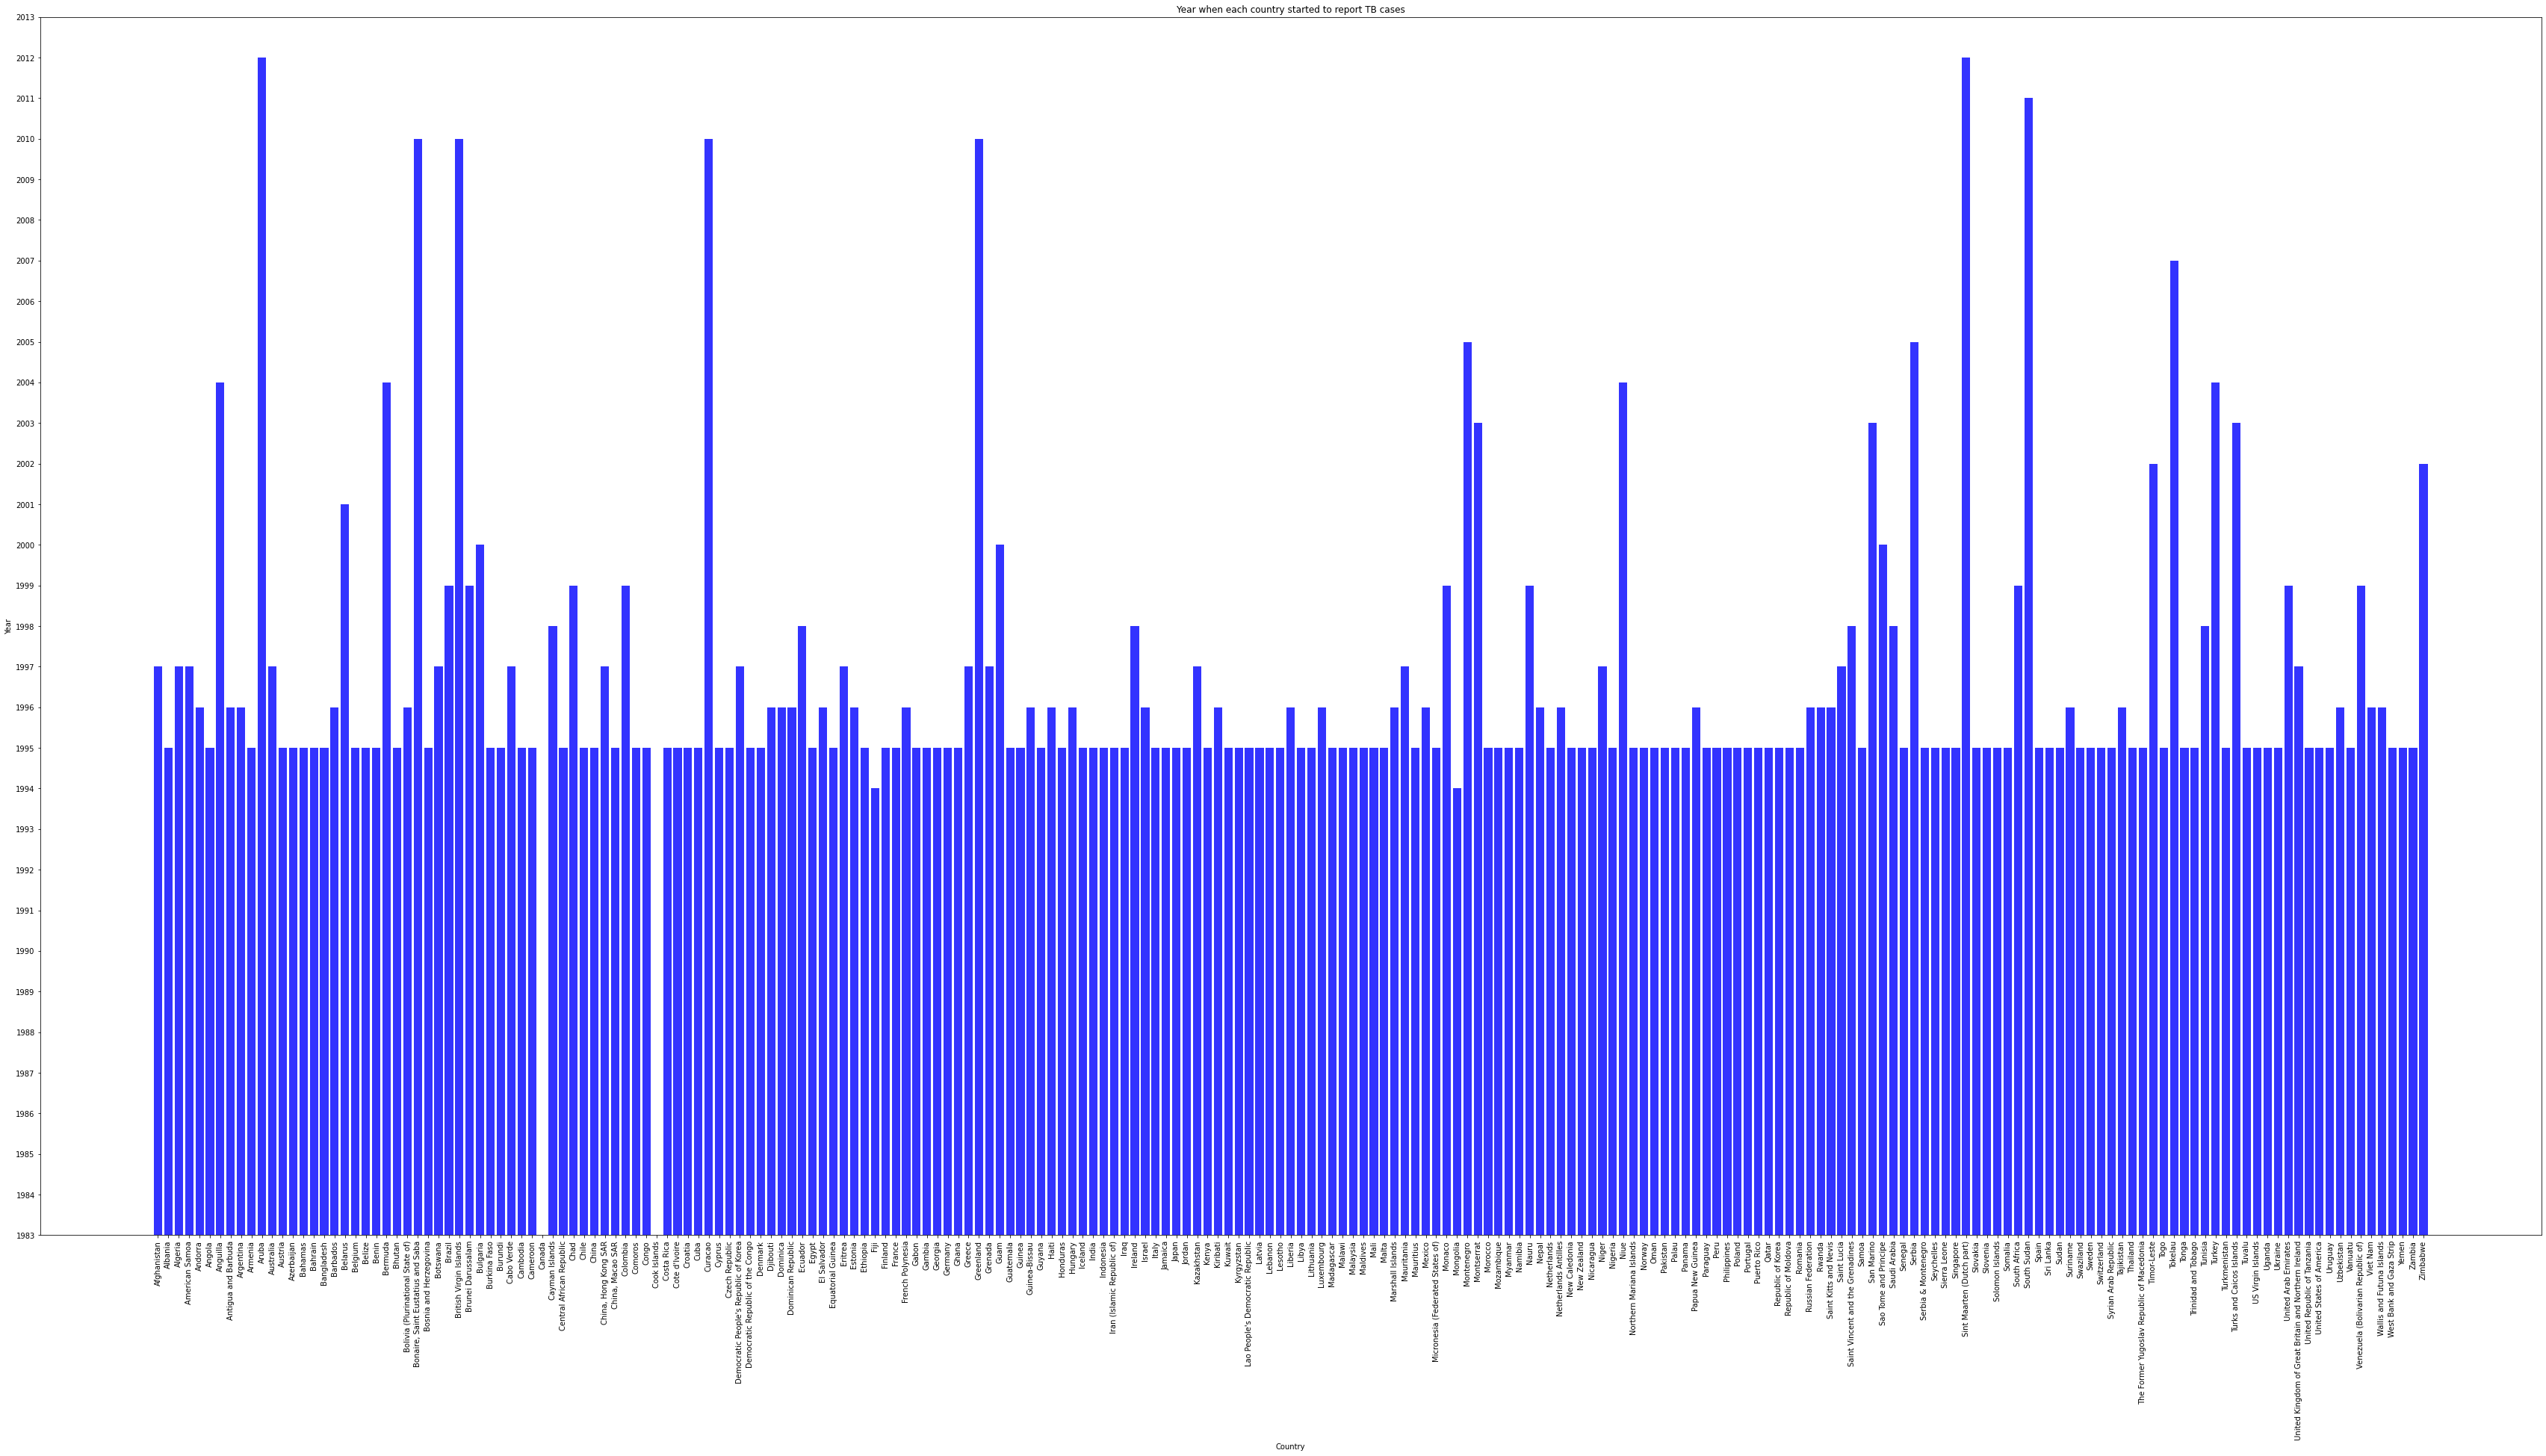

In [13]:
plt.figure(figsize=(60, 30))
df_grouped = df_final.groupby("country").first()
plt.bar(df_grouped.index, df_grouped["year"], color = "blue", alpha =0.8)
plt.xlabel("Country")
plt.ylabel("Year")
plt.title("Year when each country started to report TB cases")
plt.ylim(1983, 2013)
plt.yticks(range(1983, 2014, 1))
plt.xticks(rotation=90)
plt.show()
